<a href="https://colab.research.google.com/github/justinetaylor/mids-w207-final-project/blob/yang_branch/clear_cut_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Cover Type Prediction
#### Team: Clear-Cut Solution: Kevin Martin, Yang Jing, Justine Schabel

## Initial Setup
### Import Required Libraries

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Libraries for reading, cleaning and plotting the dataa
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import os
import re
import warnings
warnings.simplefilter("ignore")

In [2]:
# Mount the drive for file storage
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# os.chdir('/content/drive/My Drive/W207-Final-Project')

### Load Data

In [4]:
# Read in training data 
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

## Exploratory Data Analysis

#### Basic Attributes

First, we check the data attributes, quality and shape.

In [5]:
# Examine shape 
print(train_df.shape)

# Briefly examine feature attributes for the training data 
train_df.describe()

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
# Check data types
train_df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

#### Verify Dataset Is Balanced

<Figure size 432x288 with 0 Axes>

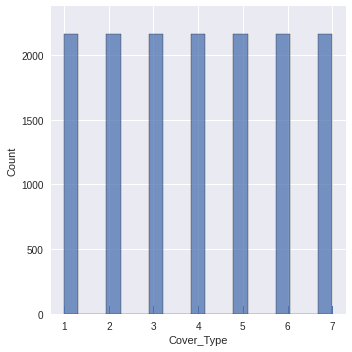

In [7]:
# Visualize the distribution of labels, "Cover_Type"
plt.figure(figsize=(6,4))
sns.displot(train_df["Cover_Type"],rug=True)
plt.show()

Here we can see that the training data has a somewhat uniform distribution of covertype and this tells us that our data set is balanced. 

#### Check For Null Values

In [8]:
# Check for NA values
# `.isna()` returns a df with bools the first `.sum()` returns series, second is int 
print("There are {} NA values in the training data".format(train_df.isna().sum().sum()))
print("There are {} NA values in the test data\n".format(train_df.isna().sum().sum()))
print("There are {} values in the training data".format(train_df.count()[0]))
print("There are {} values in the test data".format(test_df.count()[0]))

There are 0 NA values in the training data
There are 0 NA values in the test data

There are 15120 values in the training data
There are 565892 values in the test data


There are no null values in the dataset. 

#### Distributions of Numeric Columns

In [9]:
# Collect numeric feature column names - so we can easily access these columns when modifying them 
num_cols = ['Elevation', 'Slope','Aspect',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

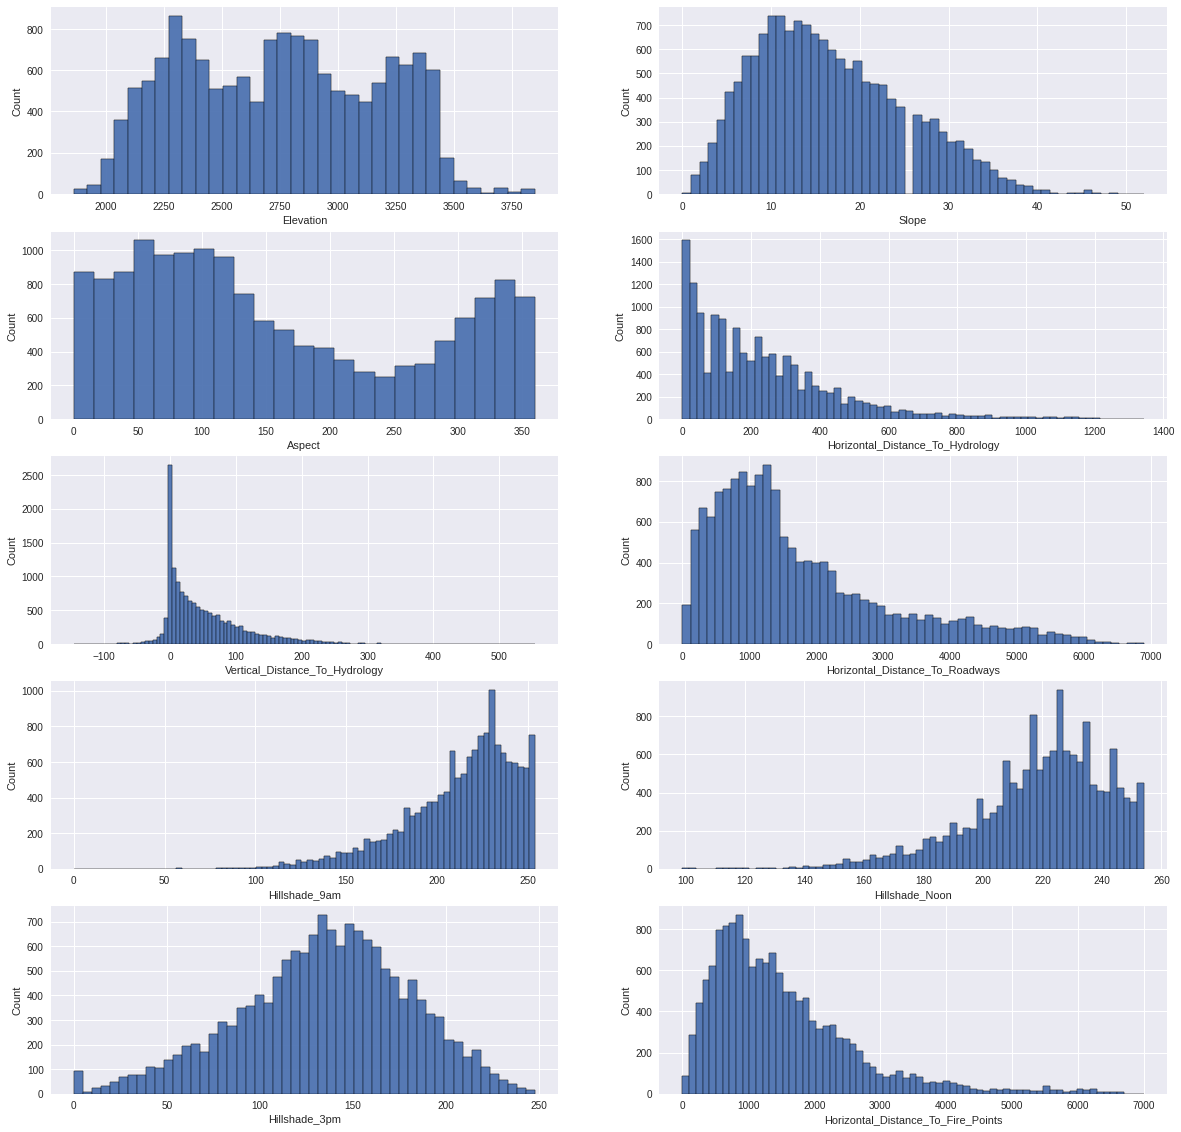

In [10]:
# Visualize the distribution of numerical columns
col_count = len(num_cols)
rows = col_count//2
fig, axes = plt.subplots(rows,2,figsize=(20,20))
for i in range(col_count):
    for j in range(2):
        # TODO: Can you explain the index manipulaions with a comment? 
        col= train_df[num_cols[j+2*(i//2)]]
        sns.histplot(col, ax=axes[i//2][j])
        axes[i//2][j].grid()

Here we can see the distribution are skewed for a few variables, espcially in the "distance" related ones, such as "Horizontal_Diestance_To_Fire_points". A log-transformation may improve the model performance. Also, there are zeros in these variables, we need to add 1 before performing the log transofrmation.

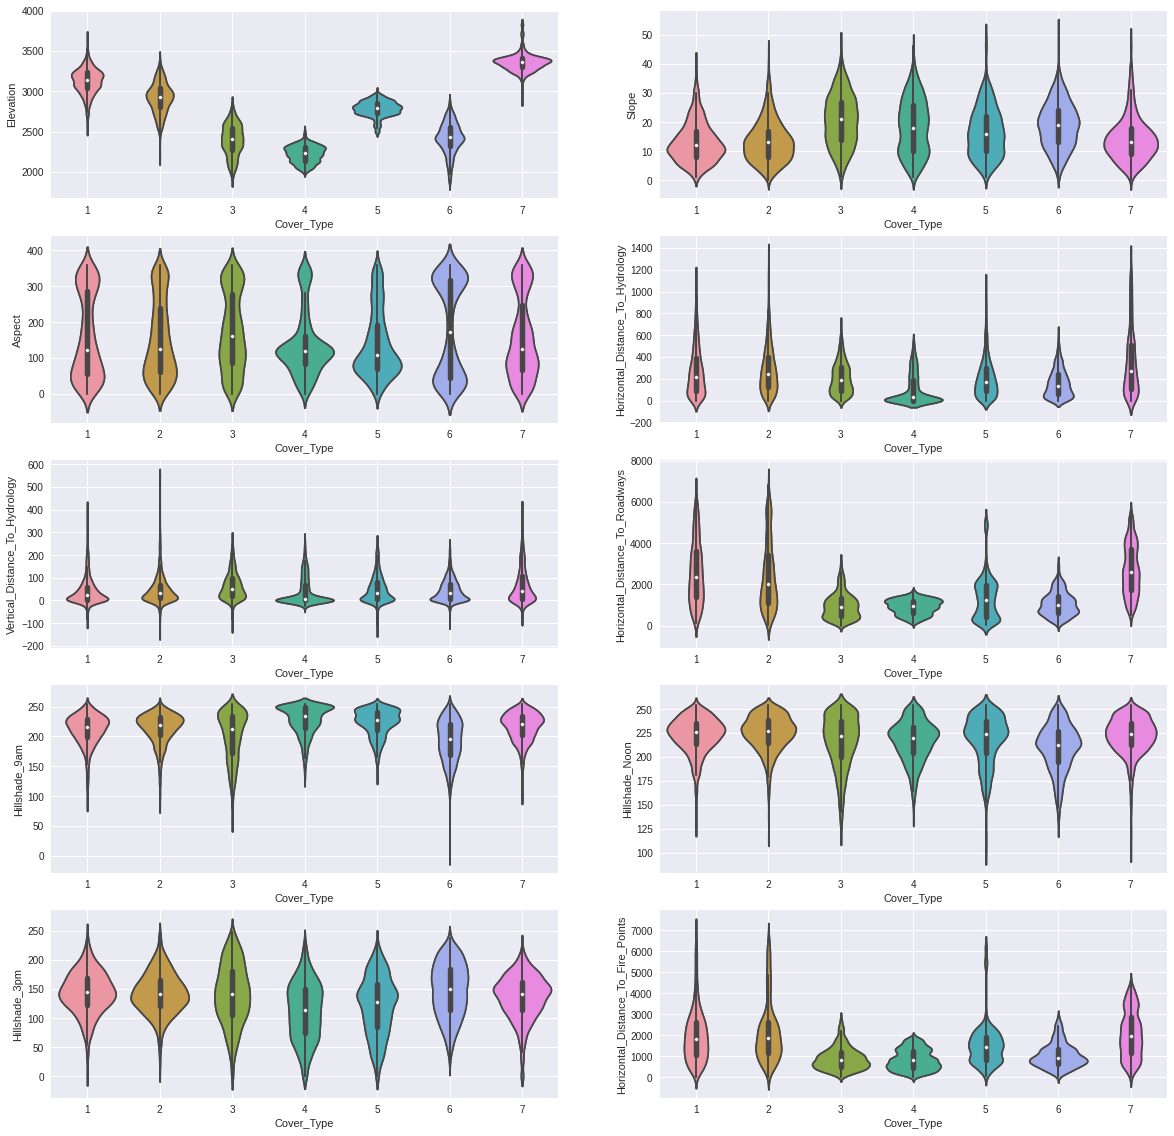

In [11]:
# Visualize the distribution of numerical columns with Cover Type
fig, axes = plt.subplots(rows,2,figsize=(20,20))
for i in range(col_count):
    for j in range(2):
        col= train_df[num_cols[j+2*(i//2)]]
        sns.violinplot(x=train_df['Cover_Type'], y= col, ax=axes[i//2][j])
        axes[i//2][j].grid()

First, we can see there is a relationship between the cover type and elevation. The difference in the other fetures by cover type seem less significant. Cover type 1 and 2 share a lot of similar features. We need to find a way to magnify the signal between the 2 cover types. 

We also see there is not much differences in the relationship between the cover type and Aspect. The Aspect is expressed in degrees, and 0 degree and 360 degree is the same thing but represented differently. This probably contributed to poor distinction among the lables. In feature engineering, we'll extract the sine and cosine values to normalize this feature.


#### Correlation

In [12]:
# Rank correlations with "cover type"
# This was train_corr1=train_df1.corr(), but train_df1 isn't defined yet? - Maybe we can remove this, since we have the heatmap below?
train_corr1=train_df.corr()
train_corr1['Cover_Type'].abs().sort_values(ascending=False)[:31]

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Wilderness_Area1                      0.230117
Soil_Type29                           0.218564
Soil_Type40                           0.205851
Soil_Type22                           0.195993
Soil_Type23                           0.158762
Soil_Type32                           0.132312
Soil_Type12                           0.129985
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Id                                    0.108363
Horizontal_Distance_To_Roadways       0.105662
Soil_Type24                           0.100797
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Soil_Type31                           0.079882
Soil_Type33                           0.078955
Wilderness_Ar

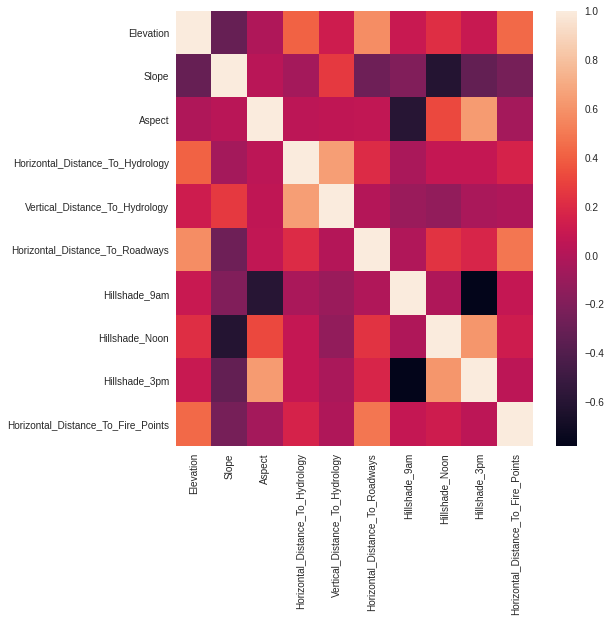

In [13]:
# Explore correlations between numerical features
train_corr = train_df[num_cols].corr()

# Plot a heat map for correlations
ax = plt.figure(figsize=(8,8))
sns.heatmap(train_corr, xticklabels=train_corr.columns.values, yticklabels=train_corr.columns.values)
plt.show()

From the above, "Hillshade_9am" has strong correlation with "Hillshade_3pm" and "Aspect". We may drop this feature to avoid multi-collinearity.

#### Soil Types

Now, we'll isolate and explore the distribution of soil types. 

In [14]:
# Get a list of categorical column names
cat_cols = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40','Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']

soil_cols = cat_cols.copy()
soil_cols.append("Cover_Type")
soil_df = train_df[soil_cols]

# Now we convert the soil type columns back into one column with values as the "soil type"
soil_df_unpivoted = soil_df.melt(id_vars="Cover_Type",var_name="soil_type",value_name="yes")
# Only keep rows of where the "soil type" is "yes"
mask1 = soil_df_unpivoted["yes"] == 1
soil_df_unpivoted = soil_df_unpivoted[mask1]


In [15]:
# Visualize cover type VS soil type in a pivot table. 
df1 = soil_df_unpivoted.groupby(["Cover_Type","soil_type"], as_index=False).count()
df1 = df1.pivot("soil_type","Cover_Type","yes")
df1

Cover_Type,1,2,3,4,5,6,7
soil_type,,,,,,,
Soil_Type1,NaN,NaN,121.0,139.0,NaN,95.0,NaN
Soil_Type10,9.0,81.0,717.0,170.0,64.0,1101.0,NaN
Soil_Type11,5.0,67.0,89.0,24.0,154.0,67.0,NaN
Soil_Type12,24.0,203.0,NaN,NaN,NaN,NaN,NaN
Soil_Type13,17.0,84.0,4.0,NaN,305.0,66.0,NaN
Soil_Type14,NaN,NaN,4.0,128.0,NaN,37.0,NaN
Soil_Type16,9.0,14.0,5.0,40.0,9.0,37.0,NaN
Soil_Type17,2.0,7.0,34.0,350.0,131.0,88.0,NaN
Soil_Type18,NaN,16.0,NaN,NaN,44.0,NaN,NaN


As we can see in the pivot table above, there are similar combinations of soil types for different "cover type". We'll combine the soil types that share same "cover types" to reduce dimensionality. Further, "cover type 1" and "cover type 2" , "cover type 3" and "cover type 6" share many overlapping features. To magnify the signal, we'll combine features as an extra feature where there is a difference between the 2 pairs of cover types.

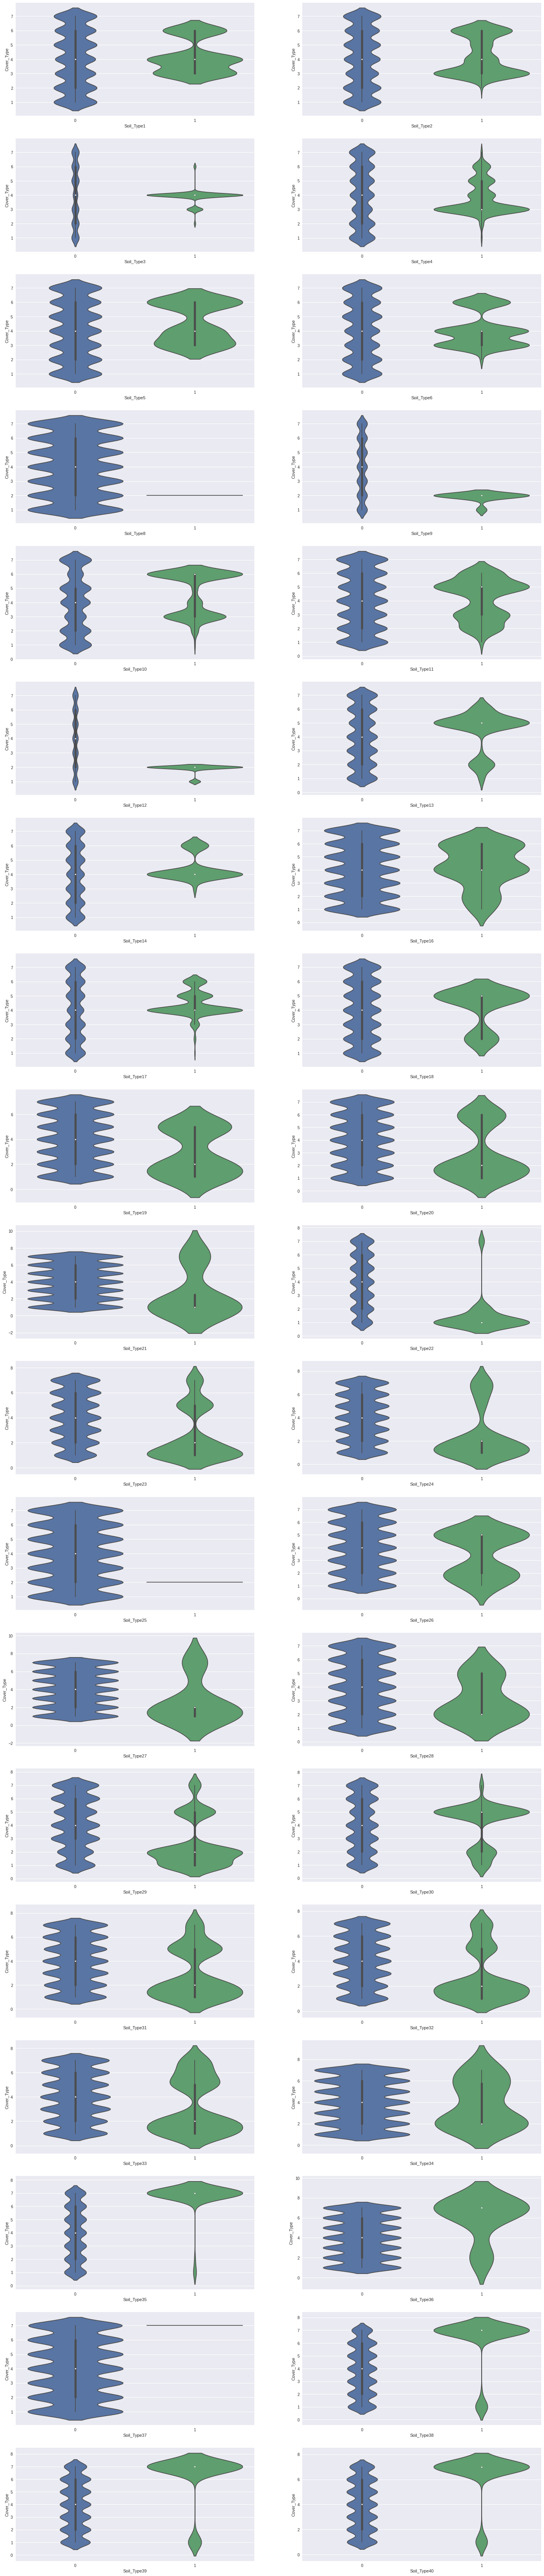

In [16]:
# Visualize the distribution of soil type and "cover type"
st_list = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16','Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

fig, axes = plt.subplots(19,2,figsize=(24,120))
for i in range(len(st_list)):
    sns.violinplot(y=train_df['Cover_Type'],x=train_df[st_list[i]], ax=axes[i//2,i%2])
plt.show()


Here we can examine the relationship between soil type and cover type for each soil type. # TODO: Discuss more

#### Wilderness Types

Now, we'll isolate and explore the distribution of wilderness types. 

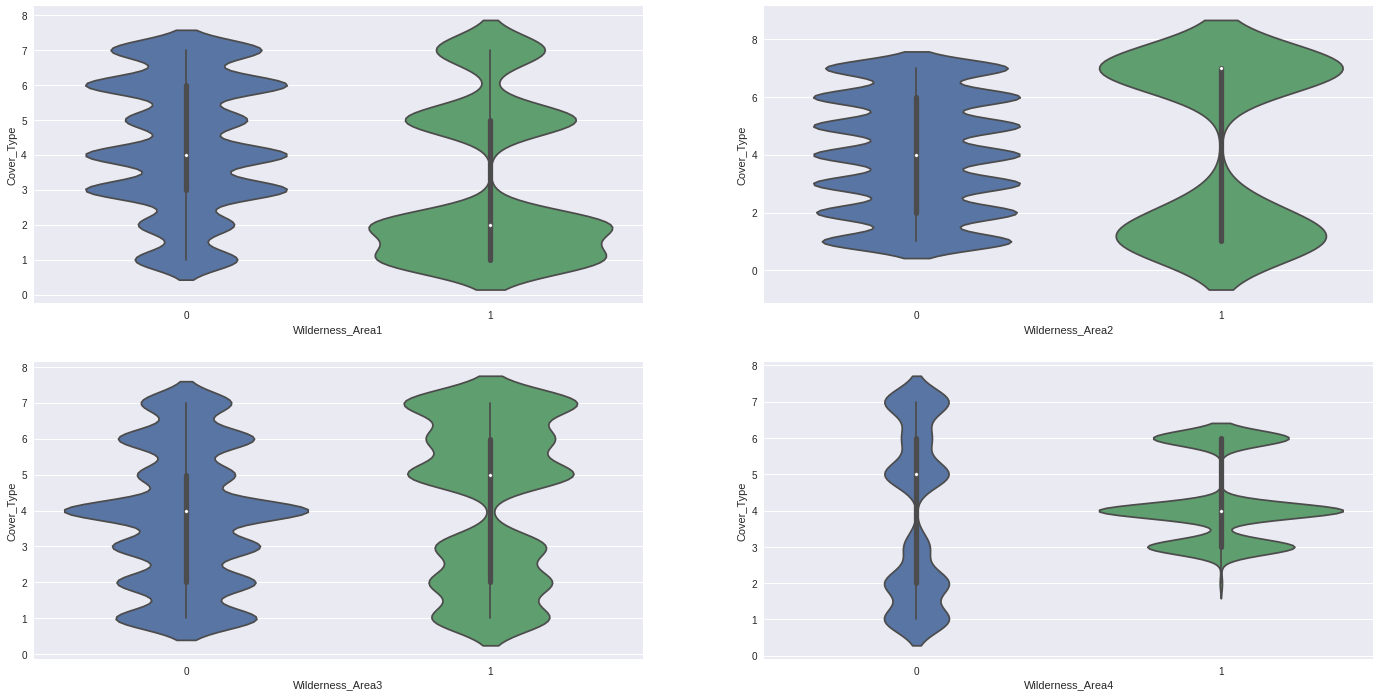

In [17]:
wilderness_list =['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']

# Visualize the distribution of wilderness area and "cover type"
fig, axes = plt.subplots(2,2,figsize=(24,12))
for i in range(4):
    sns.violinplot(y=train_df['Cover_Type'],x=train_df[wilderness_list[i]], ax=axes[i//2,i%2])
plt.show()

### End matter

#### Acknowledgements/Sources

* That helpful stack overflow post
  * https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray
* Relevant Documentation
  * KNeighborsClassifier
    * https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  * Pretty Confusion Matrix
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
  * Preprocessing
    * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
* Soil information
  * https://www.uidaho.edu/cals/soil-orders/aridisols
  
#### Backup Formats

*because sometimes you just want to look at the markdown or whatever real quick*

In [18]:
#Create a backup of the jupyter notebook in a format for where changes are easier to see.
!jupyter nbconvert exploratory_data_analysis.ipynb --to="python" --output="backups/exploratory_data_analysis"
!jupyter nbconvert exploratory_data_analysis.ipynb --to markdown --output="backups/exploratory_data_analysis"

# Also archiving this bad boy
!jupyter nbconvert exploratory_data_analysis.ipynb --to html --output="backups/exploratory_data_analysis"

[NbConvertApp] Converting notebook exploratory_data_analysis.ipynb to python
[NbConvertApp] Writing 9842 bytes to backups/exploratory_data_analysis.py
[NbConvertApp] Converting notebook exploratory_data_analysis.ipynb to markdown
[NbConvertApp] Support files will be in backups/exploratory_data_analysis_files/
[NbConvertApp] Making directory backups/exploratory_data_analysis_files/backups
[NbConvertApp] Making directory backups/exploratory_data_analysis_files/backups
[NbConvertApp] Making directory backups/exploratory_data_analysis_files/backups
[NbConvertApp] Making directory backups/exploratory_data_analysis_files/backups
[NbConvertApp] Making directory backups/exploratory_data_analysis_files/backups
[NbConvertApp] Making directory backups/exploratory_data_analysis_files/backups
[NbConvertApp] Writing 30177 bytes to backups/exploratory_data_analysis.md
[NbConvertApp] Converting notebook exploratory_data_analysis.ipynb to html
[NbConvertApp] Writing 2729429 bytes to backups/exploratory